In [9]:
#name:akshitha vuyyuru
#regno:RA2111047010172

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
adv=pd.read_csv("advertising.csv")

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.shape

(200, 4)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

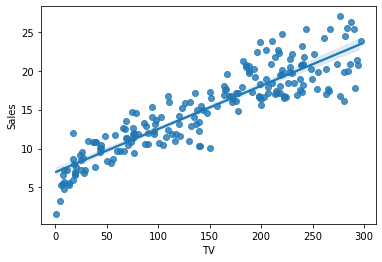

In [8]:
sns.regplot(x='TV', y='Sales', data=adv)

<AxesSubplot:xlabel='Radio', ylabel='Newspaper'>

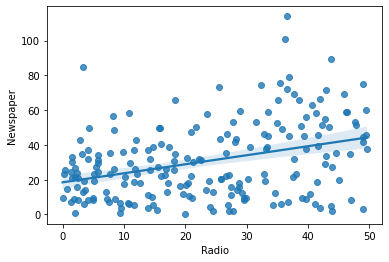

In [11]:
sns.regplot(x='Radio',y='Newspaper',data=adv)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

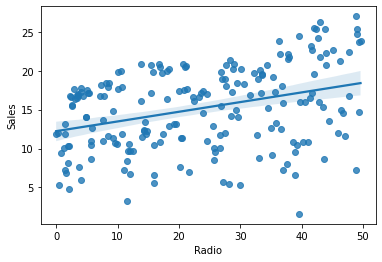

In [12]:
sns.regplot(x='Radio', y='Sales', data=adv)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

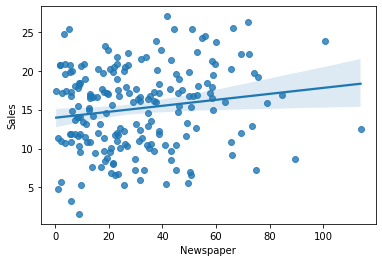

In [13]:
sns.regplot(x='Newspaper', y='Sales', data=adv)

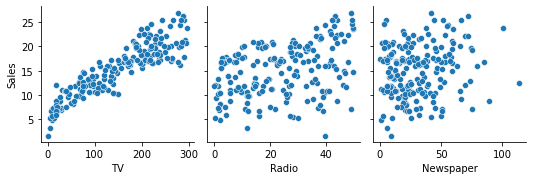

In [14]:
sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [17]:
adv.corr()#returns a matrix of pairwise linear correlation blw x and y 
#correlation:the strength of a linear relationship between two variables.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

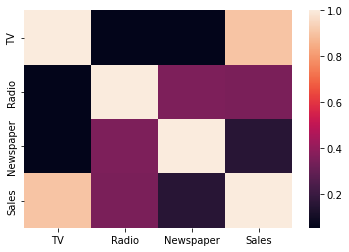

In [18]:
sns.heatmap(adv.corr())

<AxesSubplot:>

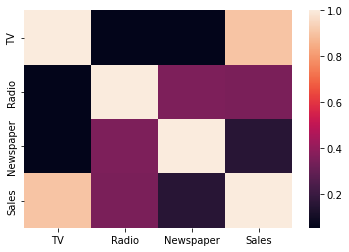

In [21]:
sns.heatmap(adv.corr(), annot=False)

<AxesSubplot:>

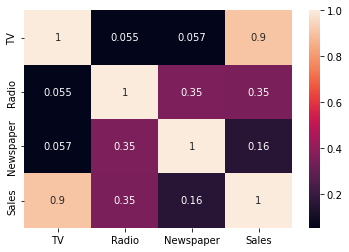

In [22]:
sns.heatmap(adv.corr(), annot=True)

In [23]:
x=adv['TV']
y=adv['Sales']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)

In [32]:
x_train_sm=sm.add_constant(x_train)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [33]:
#for fitting the model
lr=sm.OLS(y_train, x_train_sm)
lr_model=lr.fit()
lr_model.params#parameters

const    6.948683
TV       0.054546
dtype: float64

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        10:41:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

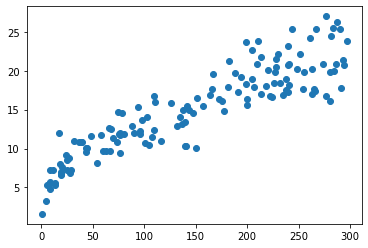

In [35]:
#for ploting
plt.scatter(x_train,y_train)

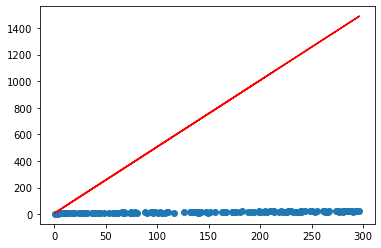

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6+5*x_train,'r')
plt.show()

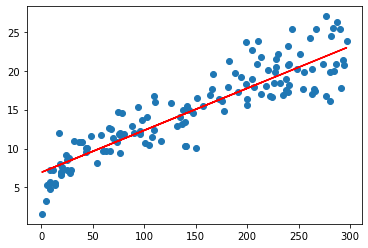

In [40]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948+0.054*x_train,'r')
plt.show()

In [41]:
#for checking error terms are normaly distributed
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [42]:
#residual
residual=y_train-y_train_pred
residual

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

<Figure size 432x288 with 0 Axes>

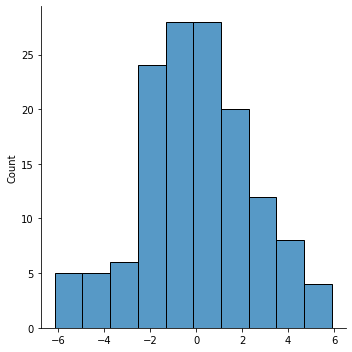

In [43]:
plt.figure()
sns.displot(residual)

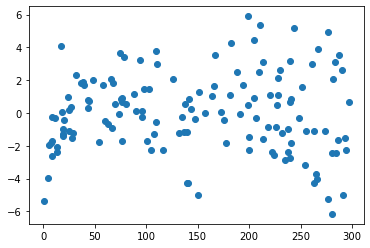

In [45]:
plt.scatter(x_train, residual)
plt.show()